## 発現変動遺伝子解析 (DEseq2) の結果をMA plotとして可視化する (T>C read)
`DESeq2`で検出された発現変動遺伝子について解析。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# color-blind safe color scheme from https://personal.sron.nl/~pault/#fig:scheme_bright
blue, cyan, green, yellow = "#4477AA", "#66CCEE", "#228833", "#CCBB44"
red, purple, grey, black = "#EE6677", "#AA3377", "#BBBBBB", "#333333"

DESeq2で検定したデータをもとにq_value < 0.05, Fold Change 1.5倍以上の遺伝子を発現変動遺伝子としてMA plotを作る。

In [2]:
# Set threshold of q_value
q_value = 0.05
FC_threshold = 1.5

def is_deg(df):
    log2FC = np.log2(FC_threshold)
    if (df["q.value"] < q_value) & (df["log2FC"] > log2FC ):
        return "up"
    elif (df["q.value"] < q_value) & (df["log2FC"] < -log2FC):
        return "down"
    else:
        return "ns"

In [3]:
df1 = pd.read_csv("../rscript/deseq2/result/Total_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(count)")
df2 = pd.read_csv("../rscript/deseq2/result/TRAP-P0_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(count)")
df3 = pd.read_csv("../rscript/deseq2/result/TRAP-GFP_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(count)")

# リードカウント0のサンプルが1つ以上ある遺伝子を除外
df1["zero"] = df1.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df2["zero"] = df2.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df3["zero"] = df3.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df1 = df1[df1["zero"] == 0]
df2 = df2[df2["zero"] == 0]
df3 = df3[df3["zero"] == 0]

df1["log2_baseMean"] = df1["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df2["log2_baseMean"] = df2["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df3["log2_baseMean"] = df3["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)

df1["deg"] = df1.apply(is_deg, axis=1) 
df2["deg"] = df2.apply(is_deg, axis=1)
df3["deg"] = df3.apply(is_deg, axis=1)    

df1.head()

,DMSO.Total.1,DMSO.Total.2,DMSO.Total.3,TPG.Total.1,TPG.Total.2,TPG.Total.3,p.value,q.value,ranking,log2FC,lfcSE,baseMean,stat,zero,log2_baseMean,deg
rownames(count),,,,,,,,,,,,,,,,
A1BG,33,35,13,28,12,23,0.376288,0.655345,7440.0,-0.473620,0.535311,23.998860,-0.884756,0,4.584894,ns
AAAS,38,31,24,30,52,35,0.574574,0.800808,9820.0,0.227688,0.405623,34.467020,0.561328,0,5.107145,ns
AACS,206,101,118,141,236,143,0.378819,0.657302,7468.0,0.209118,0.237614,153.606274,0.880075,0,7.263093,ns
AADAT,55,59,55,62,58,67,0.914883,0.965943,13582.0,0.031989,0.299300,59.043908,0.106881,0,5.883716,ns
AAGAB,334,266,284,285,270,266,0.112051,0.344605,4013.0,-0.210737,0.132619,281.682016,-1.589042,0,8.137924,ns


In [4]:
df1.to_csv("../resulted_csv/RNA-seq_DMSOvsTPG_TC_DESeq2.csv")
df2.to_csv("../resulted_csv/P-TRAP-seq_DMSOvsTPG_TC_DESeq2.csv")
df3.to_csv("../resulted_csv/L10a-TRAP-seq_DMSOvsTPG_TC_DESeq2.csv")

Expression up: 451, down: 234 (q.value < 0.05, FC threshold: 1.5)
Expression up: 421, down: 273 (q.value < 0.05, FC threshold: 1.5)
Expression up: 348, down: 192 (q.value < 0.05, FC threshold: 1.5)


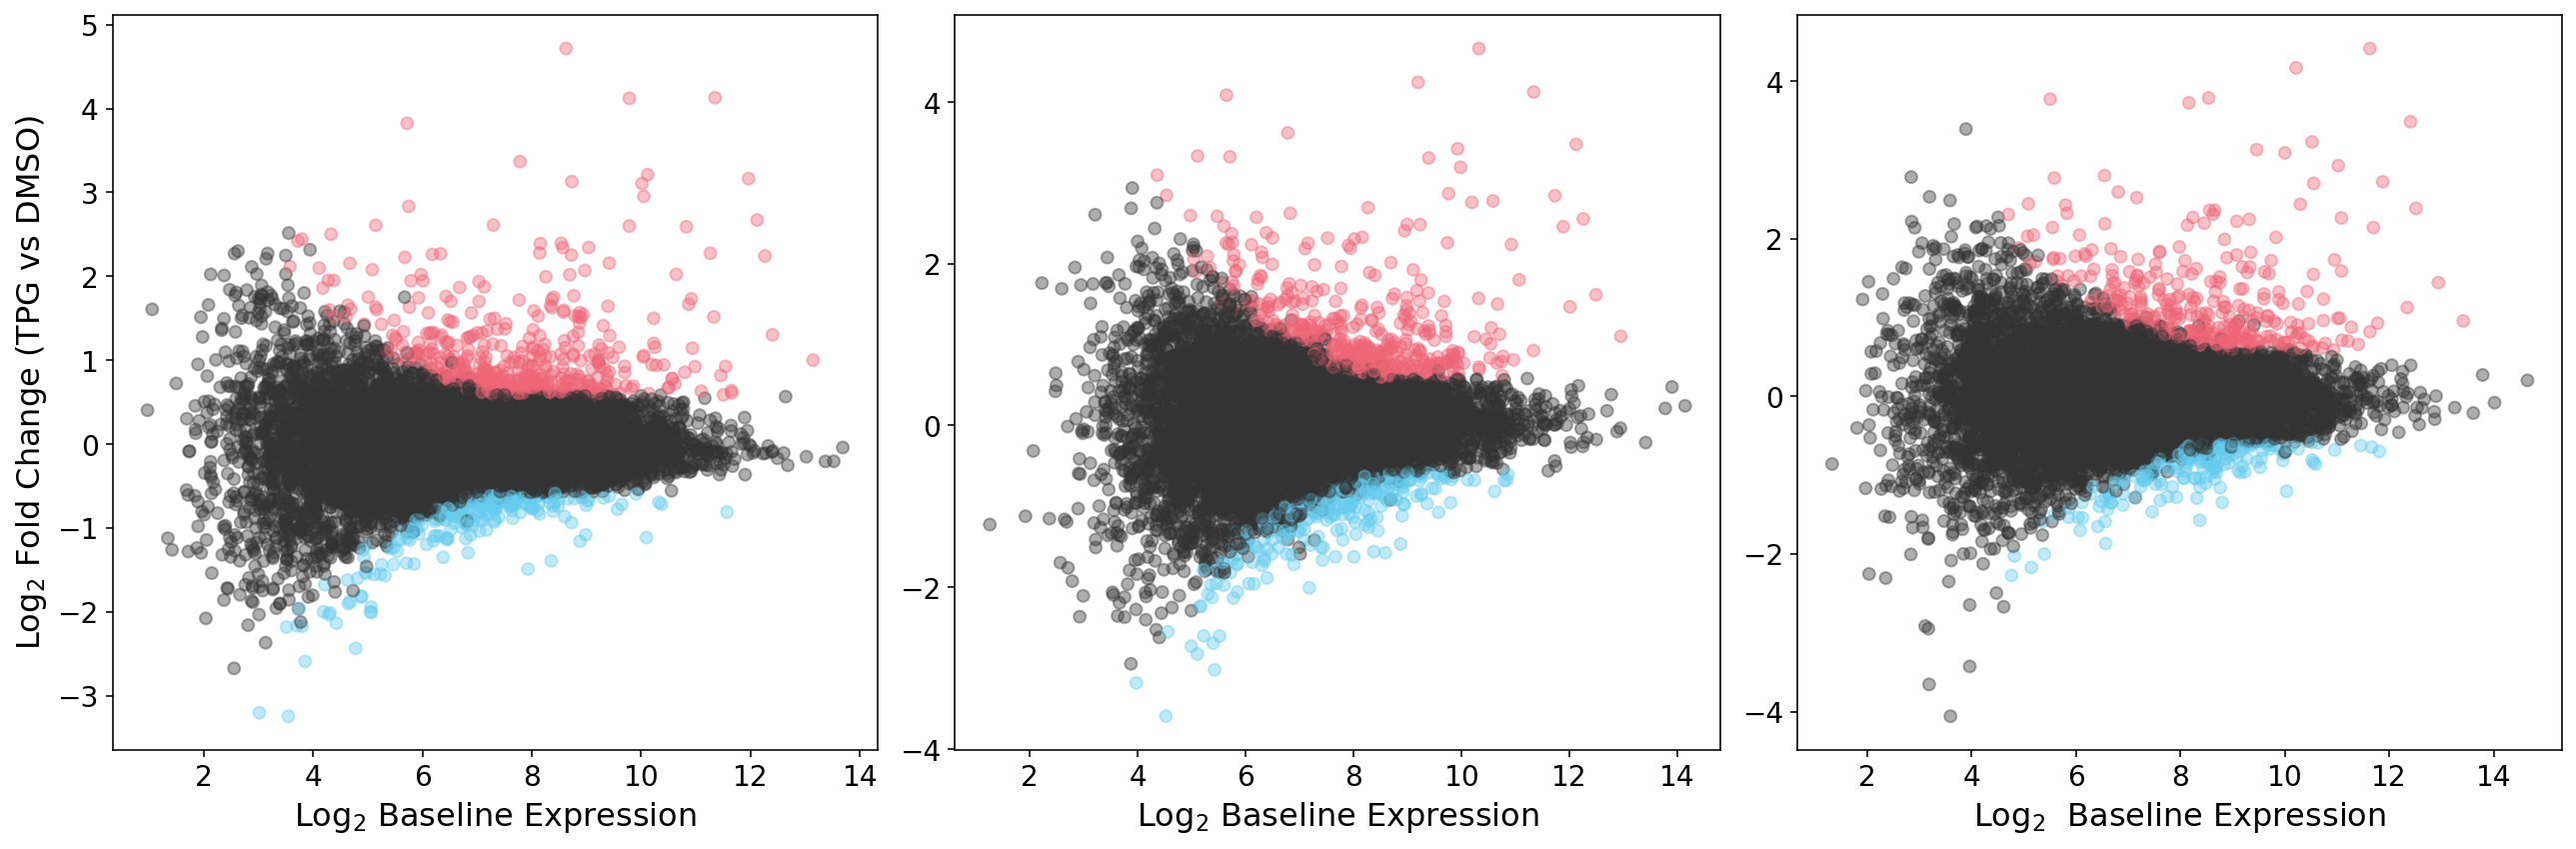

In [5]:
fig = plt.figure(figsize=(18, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.tick_params(direction="out", labelsize=14)
ax2.tick_params(direction="out", labelsize=14)
ax3.tick_params(direction="out", labelsize=14)

ax1.set_ylabel("Log" + "$_{2}$" + " Fold Change (TPG vs DMSO)", fontsize=16)

ax1.set_xlabel("Log" + "$_{2}$" + " Baseline Expression", fontsize=16)
ax2.set_xlabel("Log" + "$_{2}$" + " Baseline Expression", fontsize=16)
ax3.set_xlabel("Log" + "$_{2}$" + "  Baseline Expression", fontsize=16)

color = {"up":red, "down":cyan, "ns":black}
    
ax1.scatter(df1["log2_baseMean"], df1["log2FC"],  color=df1["deg"].map(color), alpha=0.4)
ax2.scatter(df2["log2_baseMean"], df2["log2FC"],  color=df2["deg"].map(color), alpha=0.4)
ax3.scatter(df3["log2_baseMean"], df3["log2FC"],  color=df3["deg"].map(color), alpha=0.4)
       
# print different expression genes number
df1_up = len(df1[df1["deg"] == "up"])
df1_down = len(df1[df1["deg"] == "down"])
df2_up = len(df2[df2["deg"] == "up"])
df2_down = len(df2[df2["deg"] == "down"])
df3_up = len(df3[df3["deg"] == "up"])
df3_down = len(df3[df3["deg"] == "down"])

print(f"Expression up: {df1_up}, down: {df1_down} (q.value < {q_value}, FC threshold: {FC_threshold})")
print(f"Expression up: {df2_up}, down: {df2_down} (q.value < {q_value}, FC threshold: {FC_threshold})")
print(f"Expression up: {df3_up}, down: {df3_down} (q.value < {q_value}, FC threshold: {FC_threshold})")

fig.savefig("../figure_5/MAplot_TC.pdf", bbox_inches="tight", transparent=True)

## 特定の遺伝子サブセットについて発現変動量が変化しているかどうか調べる。
小胞体ストレス時にポリソームフラクションに濃縮される遺伝子セットについて調べる。

In [6]:
genes_polysome = pd.read_csv("../geneset/Baird_2014_UPR_translated_human.csv")
genes_polysome = list(genes_polysome["Gene name"])

def is_translated_by_polysome(df):
    if df["gene"] in genes_polysome:
        return 1
    else:
        return 0

# ERにターゲティングされる遺伝子セット
genes_ER = pd.read_csv("../geneset/Reid_2014_ER_targeted_human.csv")
genes_ER = list(genes_ER["Gene name"])

def is_targeted_ER(df):
    if df["gene"] in genes_ER:
        return 1
    else:
        return 0
    
# TPG処理時にATF4とCHOPの標的となる遺伝子セット
geneset_Han = pd.read_csv("../geneset/Han_2013_ATF4-CHOP_targeted_human.csv")
targets_ATF4 = list(geneset_Han[geneset_Han["Overlap"] == "ATF4_Only"]["Gene name"])
targets_CHOP = list(geneset_Han[geneset_Han["Overlap"] == "CHOP_Only"]["Gene name"])
targets_ATF4_and_CHOP = list(geneset_Han[geneset_Han["Overlap"] == "Common"]["Gene name"])

def is_ATF4_and_CHOP_target(df):

    if (df["gene"] in targets_ATF4):
        return "ATF4"
    elif (df["gene"] in targets_CHOP):
        return "CHOP"
    elif (df["gene"] in targets_ATF4_and_CHOP):
        return "ATF4 and CHOP"
    else: 
        return "ns"
    
def is_ATF4_and_CHOP_target(df):
    if df["gene"] in list(geneset_Han["Gene name"]):
        return 1
    else:
        return 0
    
# XBP1とATF6の標的遺伝子セット
geneset_Shoulders = pd.read_csv("../geneset/Shoulders_2013_XBP1-ATF6_targeted.csv")
targets_XBP1_and_ATF6 = list(geneset_Shoulders["Symbol"])
    
def is_XBP1_and_ATF6_target(df):
    if df["gene"] in targets_XBP1_and_ATF6:
        return 1
    else:
        return 0

Cytosolic RNA-seq

In [7]:
df1 = pd.read_csv("../rscript/deseq2/result/Total_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(count)")
df2 = pd.read_csv("../rscript/deseq2/result/Total_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(count)")

df1["gene"]  = df1.index
df1["localization"] = df1.apply(is_targeted_ER, axis=1)
df1["polysome"] = df1.apply(is_translated_by_polysome, axis=1)
df1["ATF4_CHOP"] = df1.apply(is_ATF4_and_CHOP_target, axis=1)
df1["XBP1_ATF6"] = df1.apply(is_XBP1_and_ATF6_target, axis=1)

df2["gene"]  = df2.index
df2["localization"] = df2.apply(is_targeted_ER, axis=1)
df2["polysome"] = df2.apply(is_translated_by_polysome, axis=1)
df2["ATF4_CHOP"] = df2.apply(is_ATF4_and_CHOP_target, axis=1)
df2["XBP1_ATF6"] = df2.apply(is_XBP1_and_ATF6_target, axis=1)

# Count zero
df1["zero"] = df1.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df2["zero"] = df2.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df1 = df1[df1["zero"] == 0]
df2 = df2[df2["zero"] == 0]

Mann Whitney U test (ER): MannwhitneyuResult(statistic=19354795.0, pvalue=4.993381464253166e-44)
Mann Whitney U test (Polysome): MannwhitneyuResult(statistic=908047.0, pvalue=0.1416906453320754)
Mann Whitney U test (ATF4, CHOP): MannwhitneyuResult(statistic=2177106.0, pvalue=8.909737573195586e-05)
Mann Whitney U test (XBP1, ATF6): MannwhitneyuResult(statistic=1294766.0, pvalue=2.549024900039224e-22)
Mann Whitney U test (ER): MannwhitneyuResult(statistic=14507881.5, pvalue=5.913371206781795e-09)
Mann Whitney U test (Polysome): MannwhitneyuResult(statistic=847009.0, pvalue=0.24590158665836792)
Mann Whitney U test (ATF4, CHOP): MannwhitneyuResult(statistic=1872579.0, pvalue=1.7671817642406242e-06)
Mann Whitney U test (XBP1, ATF6): MannwhitneyuResult(statistic=833369.5, pvalue=3.7991965925041115e-55)


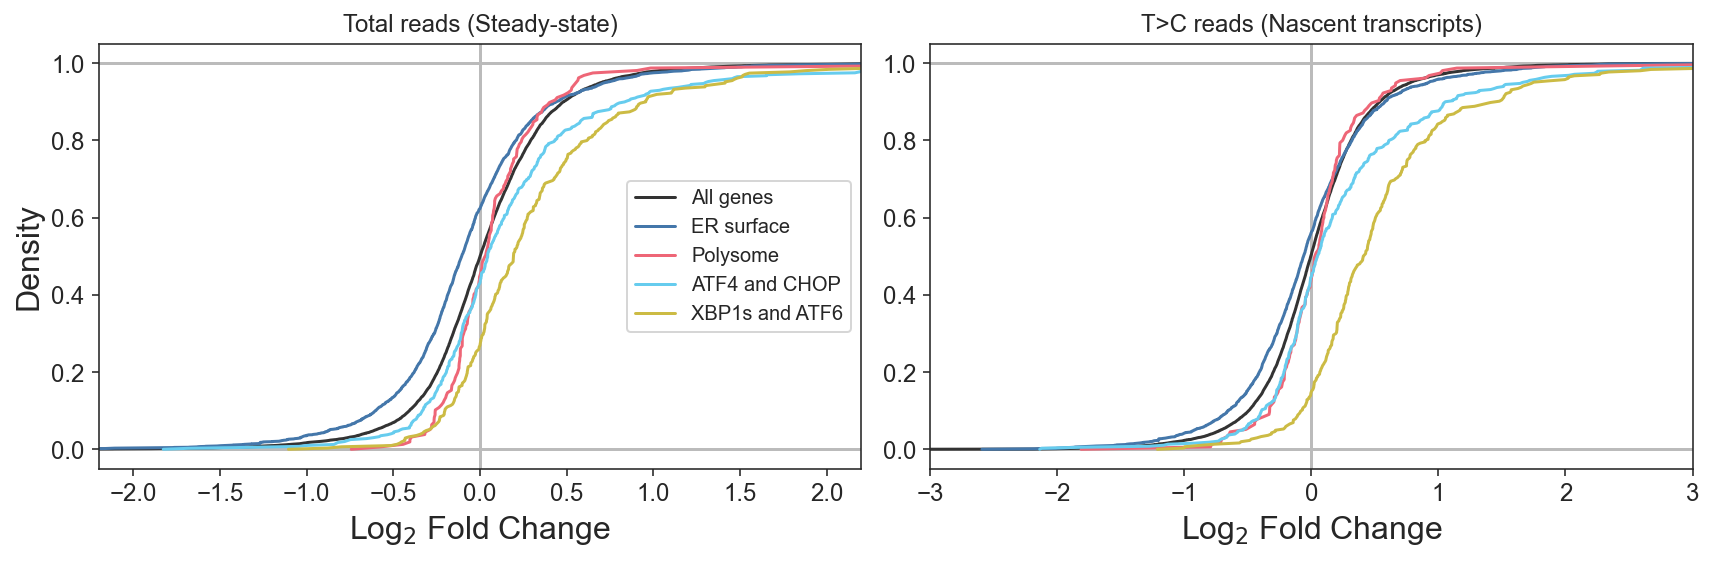

In [8]:
# subplot
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 4), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Total reads (Steady-state)")
ax1.tick_params(direction="out", labelsize=12)
ax1.axhline(0, -40, 40, color=grey, linewidth=1.5)
ax1.axhline(1, -40, 40, color=grey, linewidth=1.5)
ax1.axvline(0, -40, 40, color=grey, linewidth=1.5)

ax2.set_title("T>C reads (Nascent transcripts)")
ax2.tick_params(direction="out", labelsize=12)
ax2.axhline(0, -40, 40, color=grey, linewidth=1.5)
ax2.axhline(1, -40, 40, color=grey, linewidth=1.5)
ax2.axvline(0, -40, 40, color=grey, linewidth=1.5)

# Total reads
data1 = df1["log2FC"]                                                  # control (total genes)
data2 = df1[df1["localization"] == 1]["log2FC"]     # ER localized genes
data3 = df1[df1["polysome"] == 1]["log2FC"]        # Preferential translation uopn eIF2a-P
data4 = df1[df1["ATF4_CHOP"] == 1]["log2FC"]   # Target of ATF4 and CHOP
data5 = df1[df1["XBP1_ATF6"] == 1]["log2FC"]   # Target of XBP1 and ATF6

ax1.plot(np.sort(data1), 1 * np.arange(len(data1)) / (len(data1) - 1), color=black, label="All genes")
ax1.plot(np.sort(data2), 1 * np.arange(len(data2)) / (len(data2) - 1), color=blue, label="ER surface")
ax1.plot(np.sort(data3), 1 * np.arange(len(data3)) / (len(data3) - 1), color=red, label="Polysome")
ax1.plot(np.sort(data4), 1 * np.arange(len(data4)) / (len(data4) - 1), color=cyan, label="ATF4 and CHOP")
ax1.plot(np.sort(data5), 1 * np.arange(len(data5)) / (len(data5) - 1), color=yellow, label="XBP1s and ATF6")
ax1.legend()

# Mann–Whitney U test
KstestResult1 = stats.kstest(data1, "norm")
KstestResult2 = stats.kstest(data2, "norm")
MannResult_ER = stats.mannwhitneyu(data1, data2, alternative="two-sided")
MannResult_polysome = stats.mannwhitneyu(data1, data3, alternative="two-sided")
MannResult_ATF4CHOP = stats.mannwhitneyu(data1, data4, alternative="two-sided")
MannResult_XBP1ATF6 = stats.mannwhitneyu(data1, data5, alternative="two-sided")
print(f"Mann Whitney U test (ER): {MannResult_ER}")
print(f"Mann Whitney U test (Polysome): {MannResult_polysome}")
print(f"Mann Whitney U test (ATF4, CHOP): {MannResult_ATF4CHOP}")
print(f"Mann Whitney U test (XBP1, ATF6): {MannResult_XBP1ATF6}")

# T>C reads
data6 = df2["log2FC"]                                                  # control (total genes)
data7 = df2[df2["localization"] == 1]["log2FC"]     # ER localized genes
data8 = df2[df2["polysome"] == 1]["log2FC"]        # Preferential translation uopn eIF2a-P
data9 = df2[df2["ATF4_CHOP"] == 1]["log2FC"]   # Target of ATF4 and CHOP
data10 = df2[df2["XBP1_ATF6"] == 1]["log2FC"]   # Target of XBP1 and ATF6

ax2.plot(np.sort(data6), 1 * np.arange(len(data6)) / (len(data6) - 1), color=black)
ax2.plot(np.sort(data7), 1 * np.arange(len(data7)) / (len(data7) - 1), color=blue)
ax2.plot(np.sort(data8), 1 * np.arange(len(data8)) / (len(data8) - 1), color=red)
ax2.plot(np.sort(data9), 1 * np.arange(len(data9)) / (len(data9) - 1), color=cyan)
ax2.plot(np.sort(data10), 1 * np.arange(len(data10)) / (len(data10) - 1), color=yellow)

ax1.set_xlim(-2.2, 2.2)
ax1.tick_params(direction="out", labelsize=12)
ax1.set_xlabel("Log" + "$_{2}$" + " Fold Change", fontsize=16)
ax1.set_ylabel("Density", fontsize=16)

ax2.set_xlim(-3, 3)
ax2.tick_params(direction="out", labelsize=12)
ax2.set_xlabel("Log" + "$_{2}$" + " Fold Change", fontsize=16)

MannResult_ER = stats.mannwhitneyu(data6, data7, alternative="two-sided")
MannResult_polysome = stats.mannwhitneyu(data6, data8, alternative="two-sided")
MannResult_ATF4CHOP = stats.mannwhitneyu(data6, data9, alternative="two-sided")
MannResult_XBP1ATF6 = stats.mannwhitneyu(data6, data10, alternative="two-sided")
print(f"Mann Whitney U test (ER): {MannResult_ER}")
print(f"Mann Whitney U test (Polysome): {MannResult_polysome}")
print(f"Mann Whitney U test (ATF4, CHOP): {MannResult_ATF4CHOP}")
print(f"Mann Whitney U test (XBP1, ATF6): {MannResult_XBP1ATF6}")

fig.savefig("../figure_5/Densityplot_Total.pdf", bbox_inches="tight", transparent=True)

P-TRAP-seq

In [9]:
df1 = pd.read_csv("../rscript/deseq2/result/TRAP-P0_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(count)")
df2 = pd.read_csv("../rscript/deseq2/result/TRAP-P0_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(count)")

df1["gene"]  = df1.index
df1["localization"] = df1.apply(is_targeted_ER, axis=1)
df1["polysome"] = df1.apply(is_translated_by_polysome, axis=1)
df1["ATF4_CHOP"] = df1.apply(is_ATF4_and_CHOP_target, axis=1)
df1["XBP1_ATF6"] = df1.apply(is_XBP1_and_ATF6_target, axis=1)

df2["gene"]  = df2.index
df2["localization"] = df2.apply(is_targeted_ER, axis=1)
df2["polysome"] = df2.apply(is_translated_by_polysome, axis=1)
df2["ATF4_CHOP"] = df2.apply(is_ATF4_and_CHOP_target, axis=1)
df2["XBP1_ATF6"] = df2.apply(is_XBP1_and_ATF6_target, axis=1)

# Count zero
df1["zero"] = df1.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df2["zero"] = df2.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df1 = df1[df1["zero"] == 0]
df2 = df2[df2["zero"] == 0]

Mann Whitney U test (ER): MannwhitneyuResult(statistic=14930383.0, pvalue=1.860904587506299e-44)
Mann Whitney U test (Polysome): MannwhitneyuResult(statistic=621875.5, pvalue=1.6077252521689544e-08)
Mann Whitney U test (ATF4, CHOP): MannwhitneyuResult(statistic=1831603.0, pvalue=0.0024044018508555215)
Mann Whitney U test (XBP1, ATF6): MannwhitneyuResult(statistic=1354029.0, pvalue=2.8897302172554075e-08)
Mann Whitney U test (ER): MannwhitneyuResult(statistic=9371114.0, pvalue=3.3804138318682356e-06)
Mann Whitney U test (Polysome): MannwhitneyuResult(statistic=620961.0, pvalue=0.030931922929360495)
Mann Whitney U test (ATF4, CHOP): MannwhitneyuResult(statistic=1445837.5, pvalue=0.0029733813196146635)
Mann Whitney U test (XBP1, ATF6): MannwhitneyuResult(statistic=898117.5, pvalue=5.225715326710628e-23)


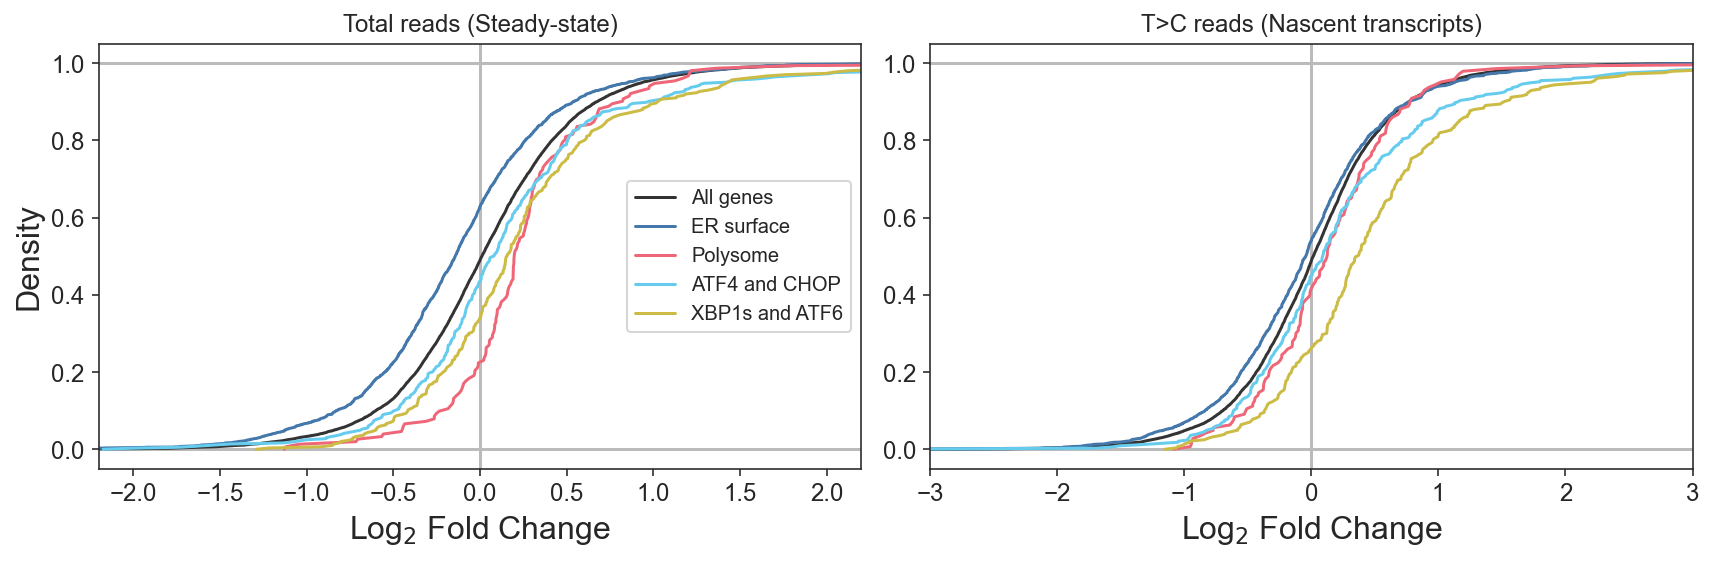

In [10]:
# subplot
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 4), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Total reads (Steady-state)")
ax1.tick_params(direction="out", labelsize=12)
ax1.axhline(0, -40, 40, color=grey, linewidth=1.5)
ax1.axhline(1, -40, 40, color=grey, linewidth=1.5)
ax1.axvline(0, -40, 40, color=grey, linewidth=1.5)

ax2.set_title("T>C reads (Nascent transcripts)")
ax2.tick_params(direction="out", labelsize=12)
ax2.axhline(0, -40, 40, color=grey, linewidth=1.5)
ax2.axhline(1, -40, 40, color=grey, linewidth=1.5)
ax2.axvline(0, -40, 40, color=grey, linewidth=1.5)

# Total reads
data1 = df1["log2FC"]                                                  # control (total genes)
data2 = df1[df1["localization"] == 1]["log2FC"]     # ER localized genes
data3 = df1[df1["polysome"] == 1]["log2FC"]        # Preferential translation uopn eIF2a-P
data4 = df1[df1["ATF4_CHOP"] == 1]["log2FC"]   # Target of ATF4 and CHOP
data5 = df1[df1["XBP1_ATF6"] == 1]["log2FC"]   # Target of XBP1 and ATF6

ax1.plot(np.sort(data1), 1 * np.arange(len(data1)) / (len(data1) - 1), color=black, label="All genes")
ax1.plot(np.sort(data2), 1 * np.arange(len(data2)) / (len(data2) - 1), color=blue, label="ER surface")
ax1.plot(np.sort(data3), 1 * np.arange(len(data3)) / (len(data3) - 1), color=red, label="Polysome")
ax1.plot(np.sort(data4), 1 * np.arange(len(data4)) / (len(data4) - 1), color=cyan, label="ATF4 and CHOP")
ax1.plot(np.sort(data5), 1 * np.arange(len(data5)) / (len(data5) - 1), color=yellow, label="XBP1s and ATF6")
ax1.legend()

# Mann–Whitney U test
KstestResult1 = stats.kstest(data1, "norm")
KstestResult2 = stats.kstest(data2, "norm")
MannResult_ER = stats.mannwhitneyu(data1, data2, alternative="two-sided")
MannResult_polysome = stats.mannwhitneyu(data1, data3, alternative="two-sided")
MannResult_ATF4CHOP = stats.mannwhitneyu(data1, data4, alternative="two-sided")
MannResult_XBP1ATF6 = stats.mannwhitneyu(data1, data5, alternative="two-sided")
print(f"Mann Whitney U test (ER): {MannResult_ER}")
print(f"Mann Whitney U test (Polysome): {MannResult_polysome}")
print(f"Mann Whitney U test (ATF4, CHOP): {MannResult_ATF4CHOP}")
print(f"Mann Whitney U test (XBP1, ATF6): {MannResult_XBP1ATF6}")

# T>C reads
data6 = df2["log2FC"]                                                  # control (total genes)
data7 = df2[df2["localization"] == 1]["log2FC"]     # ER localized genes
data8 = df2[df2["polysome"] == 1]["log2FC"]        # Preferential translation uopn eIF2a-P
data9 = df2[df2["ATF4_CHOP"] == 1]["log2FC"]   # Target of ATF4 and CHOP
data10 = df2[df2["XBP1_ATF6"] == 1]["log2FC"]   # Target of XBP1 and ATF6

ax2.plot(np.sort(data6), 1 * np.arange(len(data6)) / (len(data6) - 1), color=black)
ax2.plot(np.sort(data7), 1 * np.arange(len(data7)) / (len(data7) - 1), color=blue)
ax2.plot(np.sort(data8), 1 * np.arange(len(data8)) / (len(data8) - 1), color=red)
ax2.plot(np.sort(data9), 1 * np.arange(len(data9)) / (len(data9) - 1), color=cyan)
ax2.plot(np.sort(data10), 1 * np.arange(len(data10)) / (len(data10) - 1), color=yellow)

ax1.set_xlim(-2.2, 2.2)
ax1.tick_params(direction="out", labelsize=12)
ax1.set_xlabel("Log" + "$_{2}$" + " Fold Change", fontsize=16)
ax1.set_ylabel("Density", fontsize=16)

ax2.set_xlim(-3, 3)
ax2.tick_params(direction="out", labelsize=12)
ax2.set_xlabel("Log" + "$_{2}$" + " Fold Change", fontsize=16)

MannResult_ER = stats.mannwhitneyu(data6, data7, alternative="two-sided")
MannResult_polysome = stats.mannwhitneyu(data6, data8, alternative="two-sided")
MannResult_ATF4CHOP = stats.mannwhitneyu(data6, data9, alternative="two-sided")
MannResult_XBP1ATF6 = stats.mannwhitneyu(data6, data10, alternative="two-sided")
print(f"Mann Whitney U test (ER): {MannResult_ER}")
print(f"Mann Whitney U test (Polysome): {MannResult_polysome}")
print(f"Mann Whitney U test (ATF4, CHOP): {MannResult_ATF4CHOP}")
print(f"Mann Whitney U test (XBP1, ATF6): {MannResult_XBP1ATF6}")

fig.savefig("../figure_5/Densityplot_P-TRAP.pdf", bbox_inches="tight", transparent=True)

L10a-TRAP-seq

In [11]:
df1 = pd.read_csv("../rscript/deseq2/result/TRAP-GFP_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(count)")
df2 = pd.read_csv("../rscript/deseq2/result/TRAP-GFP_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(count)")

df1["gene"]  = df1.index
df1["localization"] = df1.apply(is_targeted_ER, axis=1)
df1["polysome"] = df1.apply(is_translated_by_polysome, axis=1)
df1["ATF4_CHOP"] = df1.apply(is_ATF4_and_CHOP_target, axis=1)
df1["XBP1_ATF6"] = df1.apply(is_XBP1_and_ATF6_target, axis=1)

df2["gene"]  = df2.index
df2["localization"] = df2.apply(is_targeted_ER, axis=1)
df2["polysome"] = df2.apply(is_translated_by_polysome, axis=1)
df2["ATF4_CHOP"] = df2.apply(is_ATF4_and_CHOP_target, axis=1)
df2["XBP1_ATF6"] = df2.apply(is_XBP1_and_ATF6_target, axis=1)

# Count zero
df1["zero"] = df1.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df2["zero"] = df2.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df1 = df1[df1["zero"] == 0]
df2 = df2[df2["zero"] == 0]

Mann Whitney U test (ER): MannwhitneyuResult(statistic=17759367.5, pvalue=1.7252178529701194e-50)
Mann Whitney U test (Polysome): MannwhitneyuResult(statistic=698394.5, pvalue=2.4100566082325577e-07)
Mann Whitney U test (ATF4, CHOP): MannwhitneyuResult(statistic=1914501.5, pvalue=4.863445361095432e-07)
Mann Whitney U test (XBP1, ATF6): MannwhitneyuResult(statistic=1336133.0, pvalue=6.377206533461843e-16)
Mann Whitney U test (ER): MannwhitneyuResult(statistic=12851807.0, pvalue=5.30724695466691e-14)
Mann Whitney U test (Polysome): MannwhitneyuResult(statistic=729963.5, pvalue=0.042146323443455626)
Mann Whitney U test (ATF4, CHOP): MannwhitneyuResult(statistic=1614412.0, pvalue=3.426146235750107e-08)
Mann Whitney U test (XBP1, ATF6): MannwhitneyuResult(statistic=927355.5, pvalue=2.147220554552549e-38)


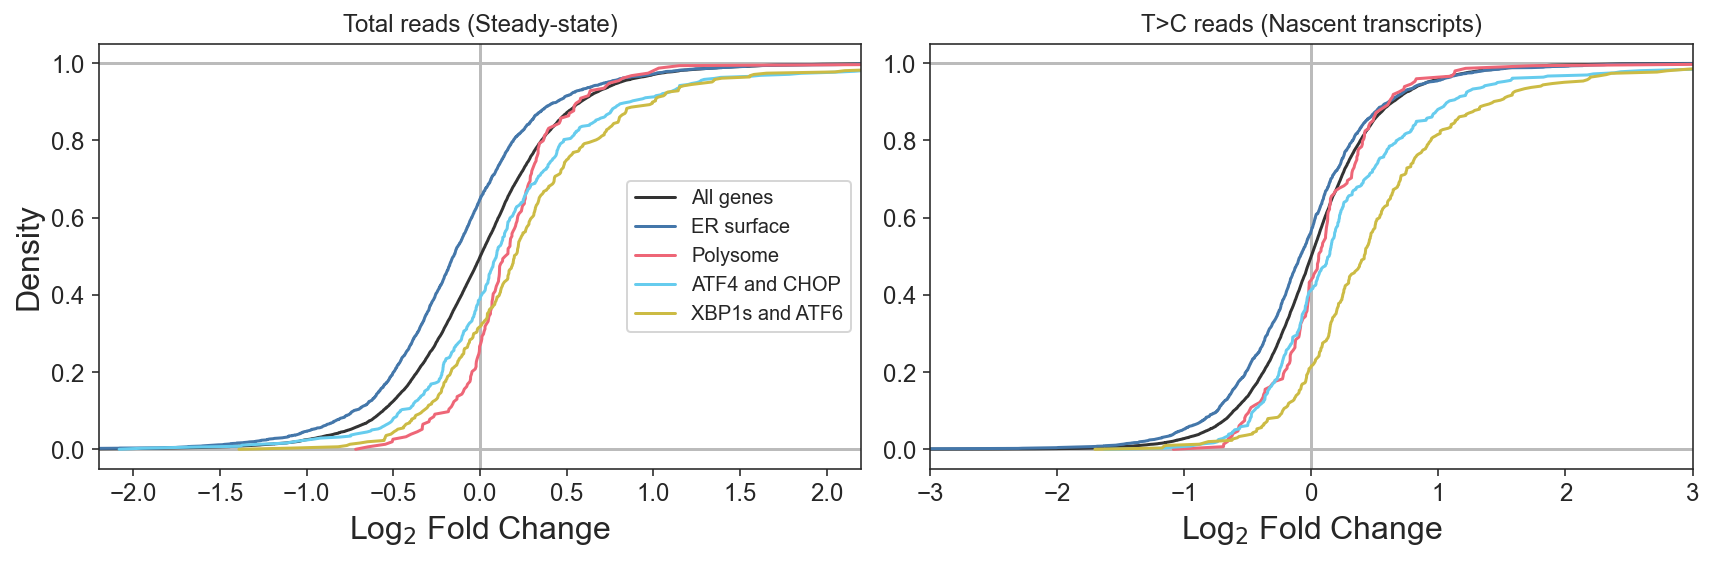

In [12]:
# subplot
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 4), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Total reads (Steady-state)")
ax1.tick_params(direction="out", labelsize=12)
ax1.axhline(0, -40, 40, color=grey, linewidth=1.5)
ax1.axhline(1, -40, 40, color=grey, linewidth=1.5)
ax1.axvline(0, -40, 40, color=grey, linewidth=1.5)

ax2.set_title("T>C reads (Nascent transcripts)")
ax2.tick_params(direction="out", labelsize=12)
ax2.axhline(0, -40, 40, color=grey, linewidth=1.5)
ax2.axhline(1, -40, 40, color=grey, linewidth=1.5)
ax2.axvline(0, -40, 40, color=grey, linewidth=1.5)

# Total reads
data1 = df1["log2FC"]                                                  # control (total genes)
data2 = df1[df1["localization"] == 1]["log2FC"]     # ER localized genes
data3 = df1[df1["polysome"] == 1]["log2FC"]        # Preferential translation uopn eIF2a-P
data4 = df1[df1["ATF4_CHOP"] == 1]["log2FC"]   # Target of ATF4 and CHOP
data5 = df1[df1["XBP1_ATF6"] == 1]["log2FC"]   # Target of XBP1 and ATF6

ax1.plot(np.sort(data1), 1 * np.arange(len(data1)) / (len(data1) - 1), color=black, label="All genes")
ax1.plot(np.sort(data2), 1 * np.arange(len(data2)) / (len(data2) - 1), color=blue, label="ER surface")
ax1.plot(np.sort(data3), 1 * np.arange(len(data3)) / (len(data3) - 1), color=red, label="Polysome")
ax1.plot(np.sort(data4), 1 * np.arange(len(data4)) / (len(data4) - 1), color=cyan, label="ATF4 and CHOP")
ax1.plot(np.sort(data5), 1 * np.arange(len(data5)) / (len(data5) - 1), color=yellow, label="XBP1s and ATF6")
ax1.legend()

# Mann–Whitney U test
KstestResult1 = stats.kstest(data1, "norm")
KstestResult2 = stats.kstest(data2, "norm")
MannResult_ER = stats.mannwhitneyu(data1, data2, alternative="two-sided")
MannResult_polysome = stats.mannwhitneyu(data1, data3, alternative="two-sided")
MannResult_ATF4CHOP = stats.mannwhitneyu(data1, data4, alternative="two-sided")
MannResult_XBP1ATF6 = stats.mannwhitneyu(data1, data5, alternative="two-sided")
print(f"Mann Whitney U test (ER): {MannResult_ER}")
print(f"Mann Whitney U test (Polysome): {MannResult_polysome}")
print(f"Mann Whitney U test (ATF4, CHOP): {MannResult_ATF4CHOP}")
print(f"Mann Whitney U test (XBP1, ATF6): {MannResult_XBP1ATF6}")

# T>C reads
data6 = df2["log2FC"]                                                  # control (total genes)
data7 = df2[df2["localization"] == 1]["log2FC"]     # ER localized genes
data8 = df2[df2["polysome"] == 1]["log2FC"]        # Preferential translation uopn eIF2a-P
data9 = df2[df2["ATF4_CHOP"] == 1]["log2FC"]   # Target of ATF4 and CHOP
data10 = df2[df2["XBP1_ATF6"] == 1]["log2FC"]   # Target of XBP1 and ATF6

ax2.plot(np.sort(data6), 1 * np.arange(len(data6)) / (len(data6) - 1), color=black)
ax2.plot(np.sort(data7), 1 * np.arange(len(data7)) / (len(data7) - 1), color=blue)
ax2.plot(np.sort(data8), 1 * np.arange(len(data8)) / (len(data8) - 1), color=red)
ax2.plot(np.sort(data9), 1 * np.arange(len(data9)) / (len(data9) - 1), color=cyan)
ax2.plot(np.sort(data10), 1 * np.arange(len(data10)) / (len(data10) - 1), color=yellow)

ax1.set_xlim(-2.2, 2.2)
ax1.tick_params(direction="out", labelsize=12)
ax1.set_xlabel("Log" + "$_{2}$" + " Fold Change", fontsize=16)
ax1.set_ylabel("Density", fontsize=16)

ax2.set_xlim(-3, 3)
ax2.tick_params(direction="out", labelsize=12)
ax2.set_xlabel("Log" + "$_{2}$" + " Fold Change", fontsize=16)

MannResult_ER = stats.mannwhitneyu(data6, data7, alternative="two-sided")
MannResult_polysome = stats.mannwhitneyu(data6, data8, alternative="two-sided")
MannResult_ATF4CHOP = stats.mannwhitneyu(data6, data9, alternative="two-sided")
MannResult_XBP1ATF6 = stats.mannwhitneyu(data6, data10, alternative="two-sided")
print(f"Mann Whitney U test (ER): {MannResult_ER}")
print(f"Mann Whitney U test (Polysome): {MannResult_polysome}")
print(f"Mann Whitney U test (ATF4, CHOP): {MannResult_ATF4CHOP}")
print(f"Mann Whitney U test (XBP1, ATF6): {MannResult_XBP1ATF6}")

fig.savefig("../figure_5/Densityplot_L10a-TRAP.pdf", bbox_inches="tight", transparent=True)

## 小胞体ストレス関連遺伝子の発現がTPG処理で上昇しているかどうか調べる¶
小胞体ストレス応答で発現が上がる典型的な遺伝子 (PDIA4, XBP1, HERPUD1, HSPA5, DDIT3, DNAJC3) についてThapsigargine処理でCPMが上昇しているかどうか調べる。

In [13]:
df = pd.read_csv("../slamdunk/csv/tcreads.csv", index_col="gene_name")

def normalized_cpm(df):
    return 10 ** 6 * df / df.sum()

df_cpm = normalized_cpm(df)  # CPM正規化
df_cpm["gene"] = df_cpm.index

df_cpm.head()

,DMSO-L10a-1,DMSO-L10a-2,DMSO-L10a-3,DMSO-P0-1,DMSO-P0-2,DMSO-P0-3,DMSO-Total-1,DMSO-Total-2,DMSO-Total-3,TPG-L10a-1,TPG-L10a-2,TPG-L10a-3,TPG-P0-1,TPG-P0-2,TPG-P0-3,TPG-Total-1,TPG-Total-2,TPG-Total-3,gene
gene_name,,,,,,,,,,,,,,,,,,,
A1BG,5.874798,1.485738,5.443547,8.945584,18.345673,7.78373,9.771481,13.148873,4.438340,6.245004,6.375248,7.285379,13.319735,13.209289,26.357954,8.216377,3.552755,7.288048,A1BG
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A1CF
A2M,0.000000,1.485738,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A2M
A2ML1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A2ML1
A4GALT,1.958266,0.000000,2.005517,0.000000,0.000000,0.00000,0.000000,0.000000,5.121162,2.341876,0.000000,0.331154,0.000000,0.000000,0.000000,0.586884,0.296063,0.000000,A4GALT


In [14]:
df_cpm.columns = ["DMSO-L10a"] * 3 + ["DMSO-P0"] * 3 + ["DMSO-Total"] * 3 + ["TPG-L10a"] * 3 + ["TPG-P0"] * 3 + ["TPG-Total"] * 3 + ["gene"]
df_melt = pd.melt(df_cpm, id_vars="gene")

df_melt.head()

,gene,variable,value
0,A1BG,DMSO-L10a,5.874798
1,A1CF,DMSO-L10a,0.000000
2,A2M,DMSO-L10a,0.000000
3,A2ML1,DMSO-L10a,0.000000
4,A4GALT,DMSO-L10a,1.958266


In [15]:
def get_condition(df):
    return df["variable"].split("-")[0]

def get_protocol(df):
    return df["variable"].split("-")[1]

df_melt["condition"] = df_melt.apply(get_condition, axis=1)
df_melt["protocol"] = df_melt.apply(get_protocol, axis=1)

df_melt.head()

,gene,variable,value,condition,protocol
0,A1BG,DMSO-L10a,5.874798,DMSO,L10a
1,A1CF,DMSO-L10a,0.000000,DMSO,L10a
2,A2M,DMSO-L10a,0.000000,DMSO,L10a
3,A2ML1,DMSO-L10a,0.000000,DMSO,L10a
4,A4GALT,DMSO-L10a,1.958266,DMSO,L10a


In [16]:
df_melt = df_melt.sort_values("protocol", ascending=False)

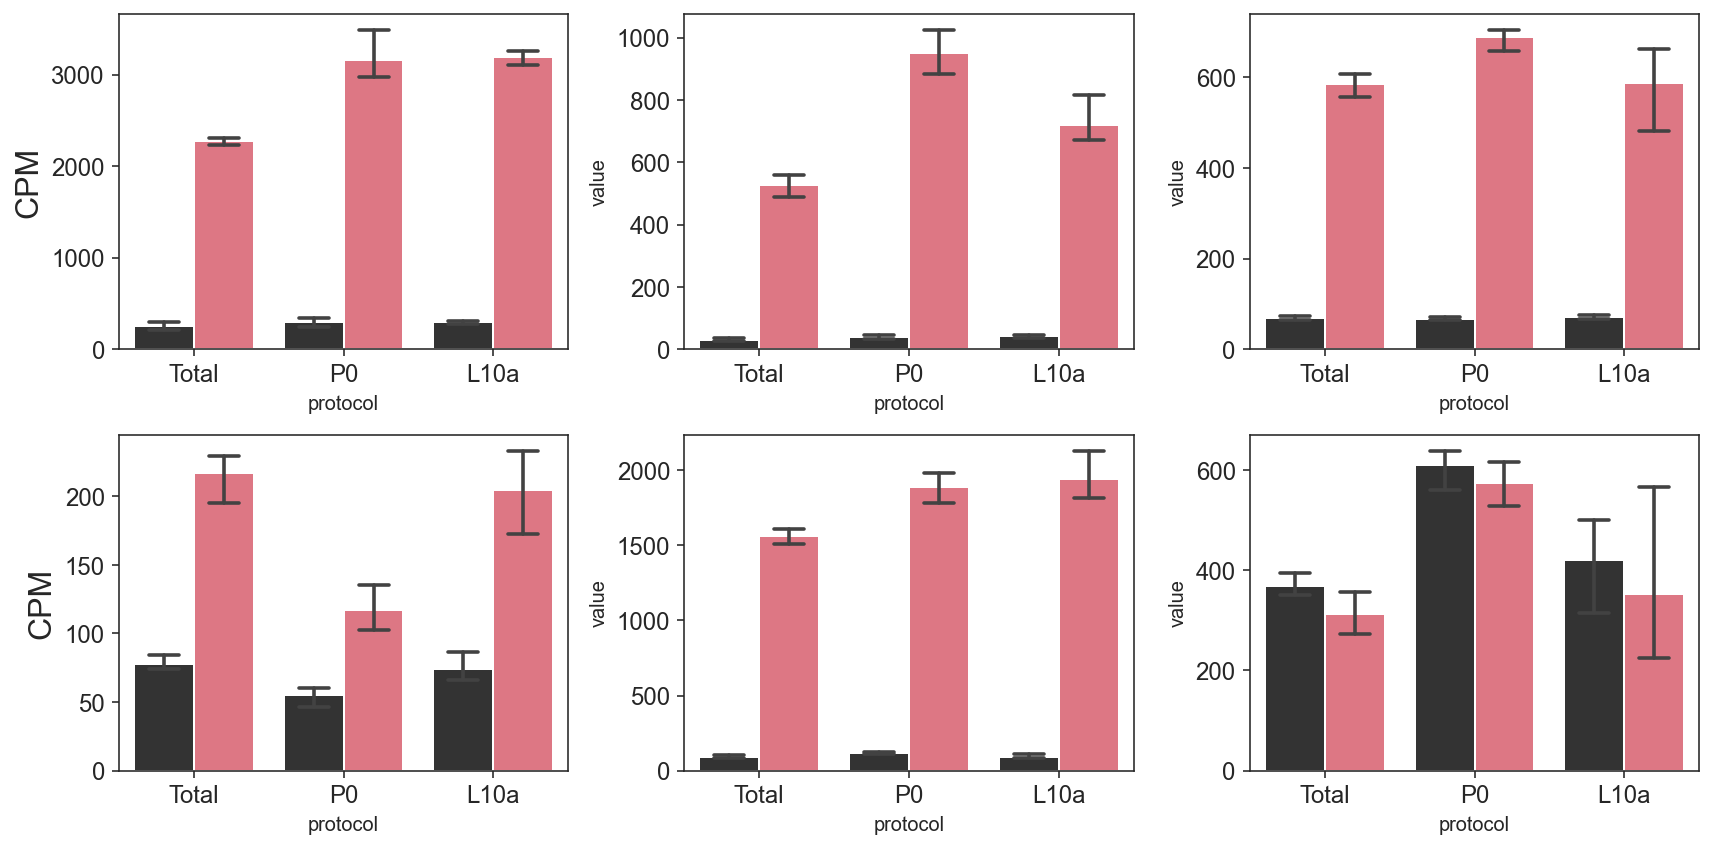

In [17]:
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

palette = {"DMSO":black, "TPG":red}

tmp = df_melt[df_melt["gene"] == "HSPA5"]
sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax1, capsize=0.2, errwidth=1.8)

tmp = df_melt[df_melt["gene"] == "DDIT3"]
sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax2, capsize=0.2, errwidth=1.8)

tmp = df_melt[df_melt["gene"] == "PDIA4"]
sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax3, capsize=0.2, errwidth=1.8)

tmp = df_melt[df_melt["gene"] ==  "DNAJC3"]
sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax4, capsize=0.2, errwidth=1.8)

tmp = df_melt[df_melt["gene"] == "HERPUD1"]
sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax5, capsize=0.2, errwidth=1.8)

tmp = df_melt[df_melt["gene"] == "GAPDH"]
sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax6, capsize=0.2, errwidth=1.8)

ax1.tick_params(direction="out", labelsize=12)
ax2.tick_params(direction="out", labelsize=12)
ax3.tick_params(direction="out", labelsize=12)
ax4.tick_params(direction="out", labelsize=12)
ax5.tick_params(direction="out", labelsize=12)
ax6.tick_params(direction="out", labelsize=12)

ax1.set_ylabel("CPM", fontsize=16)
ax4.set_ylabel("CPM", fontsize=16)

ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)
ax3.get_legend().set_visible(False)
ax4.get_legend().set_visible(False)
ax5.get_legend().set_visible(False)
ax6.get_legend().set_visible(False)

fig.savefig("../figure_5/BarPlot_CPM_TC.pdf", bbox_inches="tight", transparent=True)